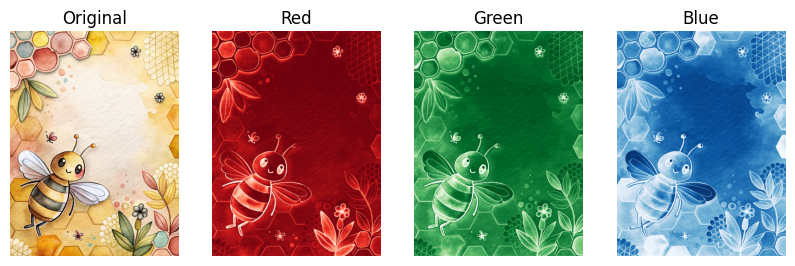

In [2]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('bee-8790316_640.jpg')  # BGR by default in OpenCV
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

r, g, b = img_rgb[:,:,0], img_rgb[:,:,1], img_rgb[:,:,2]

plt.figure(figsize=(10,5))
plt.subplot(1,4,1); plt.imshow(img_rgb); plt.title("Original"); plt.axis('off')
plt.subplot(1,4,2); plt.imshow(r, cmap='Reds'); plt.title("Red"); plt.axis('off')
plt.subplot(1,4,3); plt.imshow(g, cmap='Greens'); plt.title("Green"); plt.axis('off')
plt.subplot(1,4,4); plt.imshow(b, cmap='Blues'); plt.title("Blue"); plt.axis('off')
plt.show()

In [ ]:
### SAMPLING

In [3]:
# 📌 Goal of This Code Block
# We are simulating the effect of low sampling (i.e., reducing spatial resolution) to show what happens when an image is captured with fewer pixels.

# Think of this as:

# Taking a high-resolution photo,

# Shrinking it to a tiny version (say 32x32),

# And then blowing it up again to its original size to observe the loss of detail clearly.

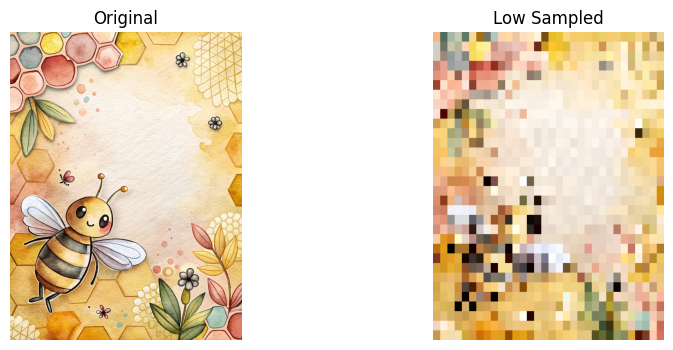

In [2]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('bee-8790316_640.jpg')  # Or use a small image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Resize to simulate low sampling
img_small = cv2.resize(img, (32, 32), interpolation=cv2.INTER_NEAREST)
img_large = cv2.resize(img_small, img.shape[1::-1], interpolation=cv2.INTER_NEAREST)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(img); plt.title("Original"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(img_large); plt.title("Low Sampled"); plt.axis('off')
plt.show()

In [ ]:
# 🖼️ What Are We Showing Visually?
# Original Image – full resolution, with high sampling.

# Low Sampled Image (then resized back) – shows what happens when the image is captured with very few pixels.

# The final image (img_large) will look pixelated, because:

# We threw away a lot of details while shrinking to 32×32.

# We used INTER_NEAREST, which copies blocks of color when enlarging (no smoothing), so it’s visually obvious where detail is lost.

In [ ]:
### simulate quantization

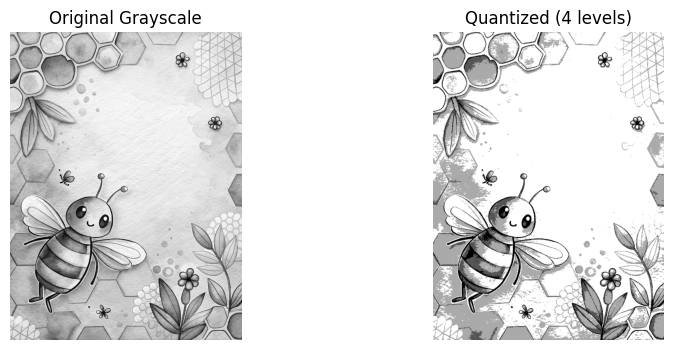

In [14]:
import numpy as np

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def quantize(img_gray, levels):
    factor = 256 // levels
    return (img_gray // factor) * factor

# Quantize to 4 levels (2-bit)
levels = 4
quant = quantize(gray, levels)
# np.floor(gray / (256 / levels)) * (256 / levels)


plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(gray, cmap='gray'); plt.title("Original Grayscale"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(quant, cmap='gray'); plt.title("Quantized (4 levels)"); plt.axis('off')
plt.show()


Level - 2


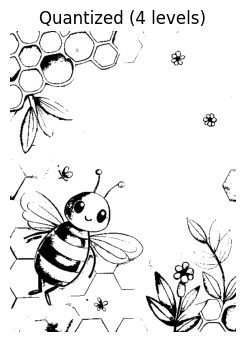

Level - 4


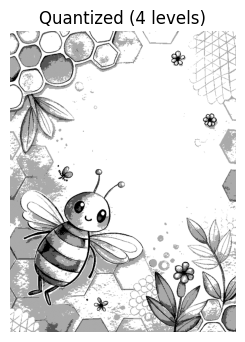

Level - 8


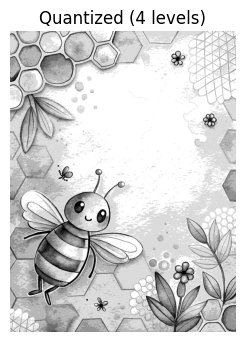

Level - 16


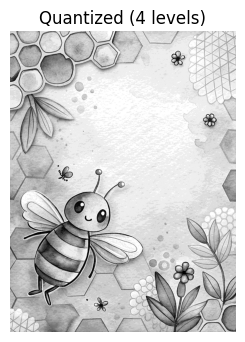

Level - 64


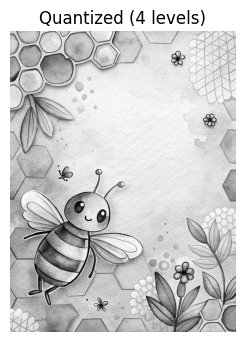

In [16]:
import numpy as np

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def quantize(img_gray, levels):
    factor = 256 // levels
    return (img_gray // factor) * factor

# Quantize to 4 levels (2-bit)
for levels in [2, 4, 8, 16, 64]:
  quant = quantize(gray, levels)
  print(f"Level - {levels}")
  plt.subplot(1,2,2); plt.imshow(quant, cmap='gray'); plt.title("Quantized (4 levels)"); plt.axis('off')
  plt.show()


In [ ]:
### SAMPLING + Quantization

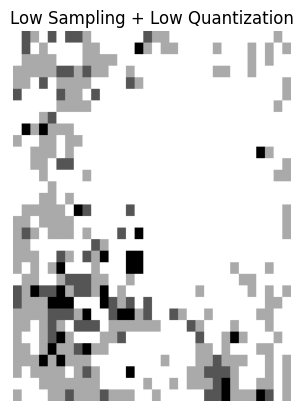

In [17]:
# Combine both
img_small = cv2.resize(gray, (32, 32), interpolation=cv2.INTER_NEAREST)
img_back = cv2.resize(img_small, gray.shape[::-1], interpolation=cv2.INTER_NEAREST)

# Quantize it
levels = 4
img_quant = np.floor(img_back / (256 / levels)) * (256 / levels)

plt.imshow(img_quant, cmap='gray')
plt.title("Low Sampling + Low Quantization")
plt.axis('off')
plt.show()

In [ ]:
### BIT DEPTH

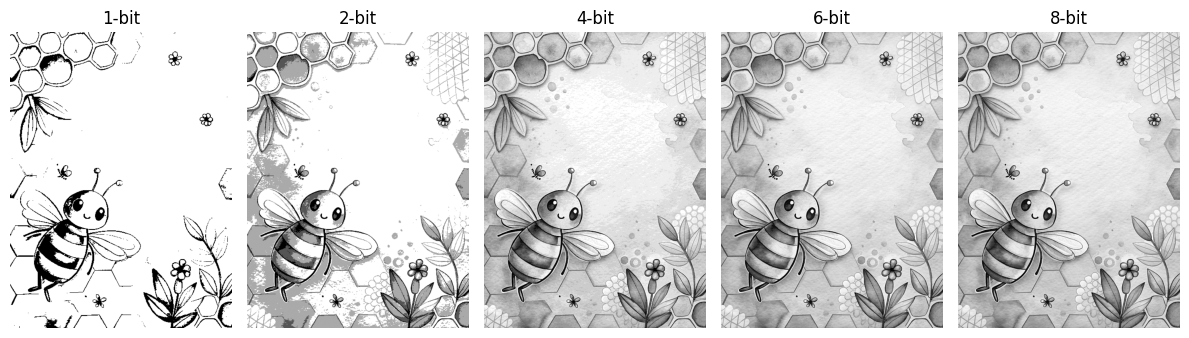

In [18]:
import cv2
import matplotlib.pyplot as plt

def simulate_bit_depth(image, bit_depth):
    levels = 2 ** bit_depth
    factor = 256 // levels
    return (image // factor) * factor

img_gray = cv2.imread('bee-8790316_640.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(12, 5))
for i, bits in enumerate([1, 2, 4, 6, 8]):
    img_sim = simulate_bit_depth(img_gray, bits)
    plt.subplot(1, 5, i+1)
    plt.imshow(img_sim, cmap='gray')
    plt.title(f'{bits}-bit')
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
### RGB , HSV

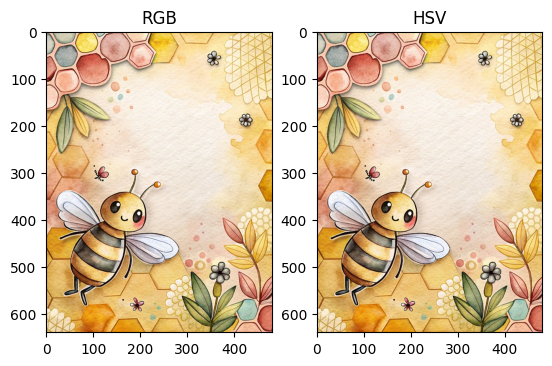

In [19]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('bee-8790316_640.jpg')         # Load image in BGR
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.subplot(1, 2, 1)
plt.title("RGB")
plt.imshow(img_rgb)

plt.subplot(1, 2, 2)
plt.title("HSV")
plt.imshow(cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB))
plt.show()


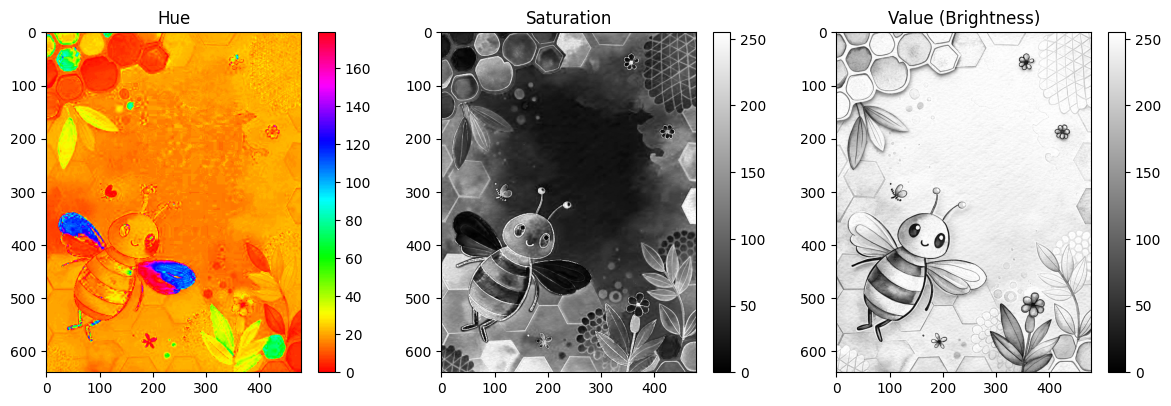

In [20]:
# Split HSV channels
h, s, v = cv2.split(img_hsv)

# Display each channel
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Hue")
plt.imshow(h, cmap='hsv')  # hue uses hsv colormap
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title("Saturation")
plt.imshow(s, cmap='gray')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title("Value (Brightness)")
plt.imshow(v, cmap='gray')
plt.colorbar()

plt.tight_layout()
plt.show()

In [ ]:
# RGB mixes Red, Green, and Blue — it's how screens display colors.

# HSV separates the concept of color (Hue), vibrancy (Saturation), and brightness (Value).

# HSV is more aligned to how humans perceive colors, which is helpful for tasks like:

# Detecting a red ball (by filtering hue)

# Enhancing low-light images (by modifying value)

In [ ]:
### Detect Red Color using HSV

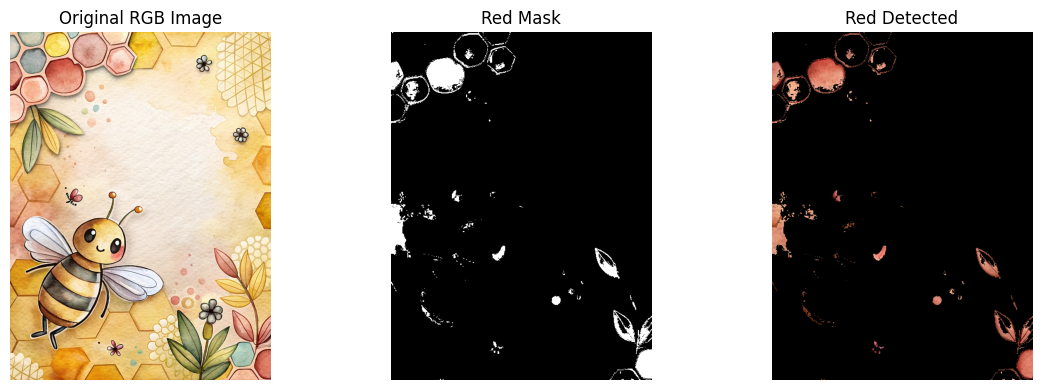

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('bee-8790316_640.jpg')       # Load as BGR
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # For display
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  # Convert to HSV

# Define red color range in HSV
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])

lower_red2 = np.array([160, 100, 100])  # Red also appears near 180 hue
upper_red2 = np.array([180, 255, 255])

# Create two masks and combine
mask1 = cv2.inRange(img_hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(img_hsv, lower_red2, upper_red2)
red_mask = cv2.bitwise_or(mask1, mask2)

# Apply mask to original image
red_detected = cv2.bitwise_and(img_rgb, img_rgb, mask=red_mask)

# Display results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Original RGB Image")
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Red Mask")
plt.imshow(red_mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Red Detected")
plt.imshow(red_detected)
plt.axis('off')

plt.tight_layout()
plt.show()
